### Solutions

Q3.

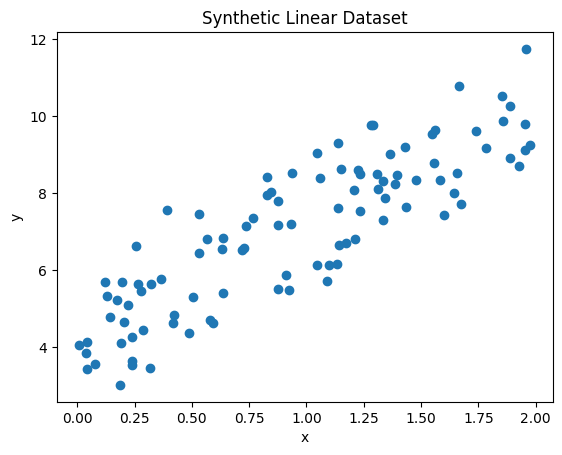

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
x = 2 * np.random.rand(100, 1)
true_m = 3  # true slope
true_b = 4  # true intercept
y = true_m * x + true_b + np.random.randn(100, 1)

# Plot the data
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Dataset")
plt.show()


In [4]:
def compute_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

In [33]:
def gradient_descent_(x,y, lr=0.05, epochs=100):
    m,b = 0,0
    n = len(y)
    for _ in range(epochs):
        y_pred = m * x + b
        loss = compute_mse(y, y_pred)
        m_gradient = -(2/n) * np.sum(x * (y-y_pred))
        b_gradient = (-2/n) * np.sum(y-y_pred)
        m -= lr * m_gradient
        b -= lr * b_gradient

    return m, b, loss

optimal_m, optimal_b, final_loss = gradient_descent_(x,y)
print(f"Optimal m: {optimal_m}, Optimal b: {optimal_b}, Final Loss: {final_loss}")


Optimal m: 1.9966565726996075e-10, Optimal b: -5.0821976835258e-23, Final Loss: 1.9966565721075914e-11


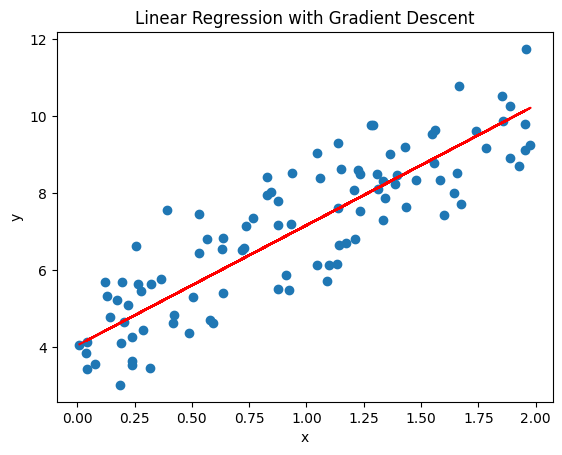

In [7]:
plt.scatter(x, y)
plt.plot(x, optimal_m * x + optimal_b, color='red')  # regression line
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.show()


Gradient Descent Concept:

The core idea of gradient descent is to adjust the parameters (m and b in this case) iteratively to minimize the loss function (MSE in this example).
The direction and magnitude of the adjustment at each step are determined by the gradient of the loss function with respect to each parameter.

Calculating the Gradients:

The gradient is a vector that points in the direction of the steepest increase of the function. For minimization, we move in the opposite direction of the gradient.
In our linear regression model, the loss function (MSE) is a function of m and b.

Gradients for m and b:

m_gradient is the partial derivative of the loss function with respect to m. It tells us how much the loss function changes with a small change in m.
b_gradient is the partial derivative of the loss function with respect to b. It indicates how much the loss function changes with a small change in b.

The Formulas:

For Mean Squared Error, the partial derivative with respect to m is calculated as:


$$
\frac{\partial}{\partial m} \text{MSE} = \frac{-2}{n} \sum_{i=1}^{n} \left( x_i \cdot (y_i - \hat{y}_i) \right)
$$


$$
\frac{\partial}{\partial b} \text{MSE} = \frac{-2}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)
$$


Updating the Parameters:

The parameters are updated in the direction opposite to the gradient, which is why we subtract the gradient from the current values.
The learning rate (lr) controls the size of these updates. A smaller learning rate means smaller steps towards the minimum.

Q4. Visualize the Gradient Descent Optimization:

- Create a 3D plot or contour plot of the loss surface for a simple function, like a quadratic function $f(x) = ax^2 + bx + c $
- Implement gradient descent to minimize f(x)
- On the plot, visualize the path taken by gradient descent towards the minimum.

In [11]:
# Define the Function and its Gradient

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y


In [26]:
# Implement gradient descent

def gradient_descent(start_x, start_y, lr=0.1, epochs=10):
    x, y = start_x, start_y
    path = [(x, y)]
    for _ in range(epochs):
        grad_x, grad_y = grad_f(x, y)
        x -= lr * grad_x
        y -= lr * grad_y
        path.append((x, y))
    return np.array(path)


Text(0.5, 1.0, 'Contour Plot of f(x, y)')

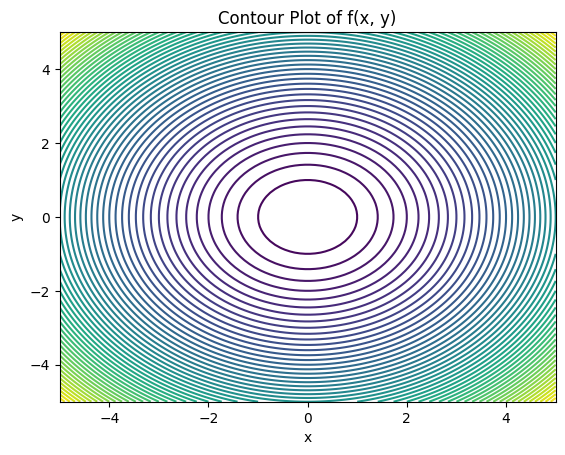

In [15]:
# Step 3: Create a Contour Plot of the Function

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y)')


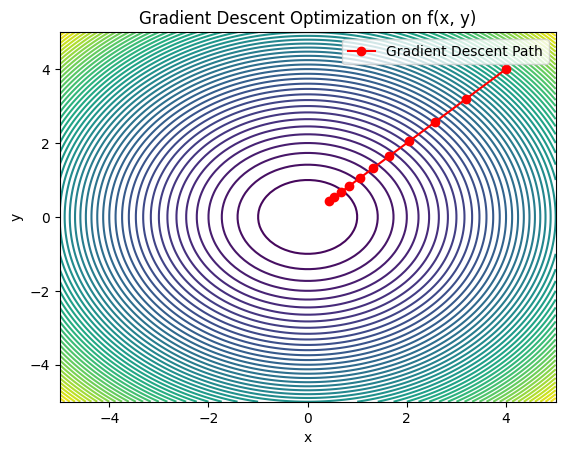

In [27]:
# Visualise the path of gradient descent
path = gradient_descent(start_x=4.0, start_y=4.0, lr=0.1, epochs=10)

plt.contour(X, Y, Z, levels=50)
plt.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization on f(x, y)')
plt.legend()
plt.show()

Q5. Experiment with different learning rates 

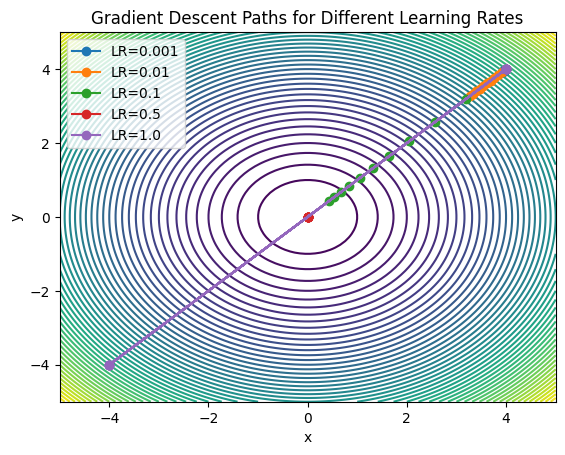

In [28]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

paths = {}
for lr in learning_rates:
    paths[lr] = gradient_descent(start_x=4.0, start_y=4.0, lr=lr, epochs=10)

plt.contour(X, Y, Z, levels=50)

for lr, path in paths.items():
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f'LR={lr}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.show()

- Small Learning Rate: If the learning rate is too small, you'll notice that the path of gradient descent progresses very slowly towards the minimum. It might not even reach the minimum within the given number of epochs.
- Large Learning Rate: If the learning rate is too large, the path might oscillate around the minimum or even diverge (move away from the minimum).
- Optimal Learning Rate: An optimal learning rate usually shows a steady and quick convergence to the minimum.

Q5. Compare batch gradient descent to stochastic gradient descent:

- Batch Gradient Descent: Computes the gradient of the cost function with respect to the parameters for the entire training dataset. It's computationally intensive, especially with large datasets.
- Stochastic Gradient Descent (SGD): Computes the gradient and updates the parameters for each training example one by one. It's much faster but can be more erratic in finding the minimum.

In [21]:
def stochastic_gradient_descent(x, y, lr=0.01, epochs=10):
    m, b = 0, 0  # initial parameters
    n = len(y)
    for _ in range(epochs):
        for i in range(n):
            xi = x[i]
            yi = y[i]
            y_pred = m * xi + b
            m_gradient = -2 * xi * (yi - y_pred)
            b_gradient = -2 * (yi - y_pred)
            m -= lr * m_gradient
            b -= lr * b_gradient
    return m, b


In [34]:
batch_m, batch_b, loss = gradient_descent_(x, y)
sgd_m, sgd_b = stochastic_gradient_descent(x, y)

# Compare the final parameters and performance
print(f"Batch Gradient Descent: m = {batch_m}, b = {batch_b}")
print(f"Stochastic Gradient Descent: m = {sgd_m}, b = {sgd_b}")


Batch Gradient Descent: m = 1.9966565726996075e-10, b = -5.0821976835258e-23
Stochastic Gradient Descent: m = 3.7238215510780986e-10, b = 2.444200978893717e-06


Observations to Make:
- Convergence Pattern: SGD might fluctuate more compared to batch gradient descent.
- Speed: SGD is generally faster per iteration since it processes one data point at a time.
- Accuracy: Batch gradient descent might be more accurate but requires more computation.